Uploading data from csv files

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("C:/Users/hgfer/OneDrive/Documentos/Notebooks/Titanic/train.csv")
test = pd.read_csv("C:/Users/hgfer/OneDrive/Documentos/Notebooks/Titanic/test.csv")


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Dropping the "Survived" column from the train dataset.

In [5]:
train_drop = train.drop(columns = ['Survived'])
y = train.Survived
n_train = train.shape[0]

In [6]:
print(train_drop .info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null

We can see that we have some missing information:
  - Train: Age, Cabin, Embarked
  - Test: Age, Fare, Cabin
    

# 1. Data Visualization

Let's check the proportion of deaths group by age, class and gender.

## 1.1 Age

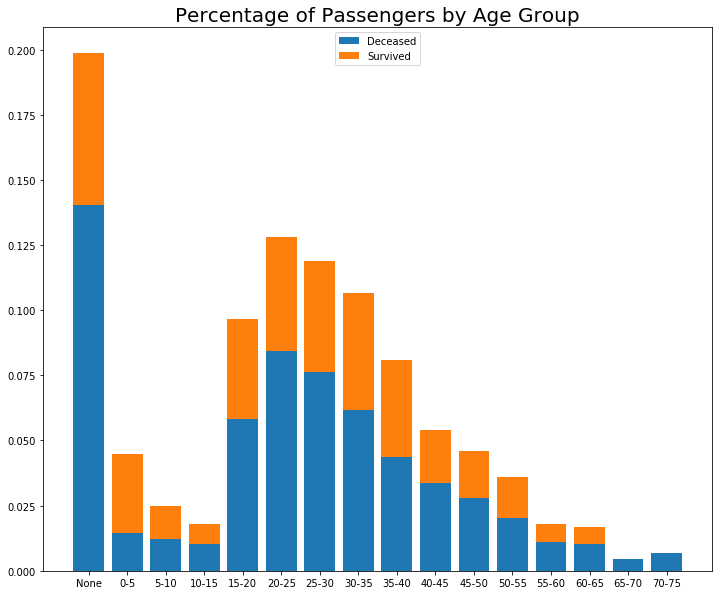

In [8]:
# grouping the ages every five years
age_group = train.Age // 5 + 1

# fill the NaN values in the feature
age_group.fillna(0, inplace = True)

# total people
num_people = train.shape[0]

# number of deaths and survivors by age
death_age_group = age_group[train["Survived"] == 0].value_counts()
survivor_age_group = age_group[train["Survived"] == 1].value_counts()

# sorting the index
ind = np.sort(death_age_group.index.values)

# the width of the bars
width = 0.8

# ploating graph
plt.figure(figsize=(12, 10))

death_bar = plt.bar(ind,death_age_group[ind]/num_people,width)
survivor_bar = plt.bar(ind,survivor_age_group[ind]/num_people,width, bottom = death_age_group[ind]/num_people)

plt.title('Percentage of Passengers by Age Group', fontdict={'fontsize':20})
age_groups_ticks = ['None'] + ['{}-{}'.format(int(i * 5), int((i + 1)* 5)) for i in ind[0:]]
plt.xticks(ind, age_groups_ticks)
plt.legend((death_bar[0], survivor_bar[0]), ('Deceased', 'Survived'))

plt.show()


As we can see more than half of the children survived.

In [9]:
train[train.Age <= 15].Survived.value_counts(normalize = True)

1    0.590361
0    0.409639
Name: Survived, dtype: float64

But with the adults the situation is different.

In [10]:
train[train.Age >= 15].Survived.value_counts(normalize = True)

0    0.61478
1    0.38522
Name: Survived, dtype: float64

## 1.2 Class

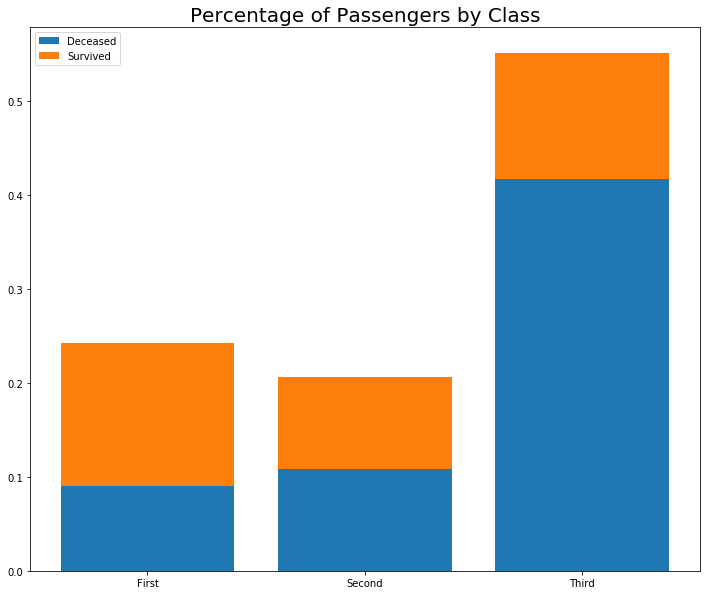

In [11]:
# number of deaths and survivors by class
death_class = train.Pclass[train["Survived"] == 0].value_counts()
survivor_class = train.Pclass[train["Survived"] == 1].value_counts()

#index
ind = [1, 2, 3]

# ploating graph
plt.figure(figsize=(12, 10))

death_class_bar = plt.bar(ind,death_class[ind].values/num_people, width)
survivor_class_bar = plt.bar(ind,survivor_class[ind].values/num_people, width, bottom = death_class[ind].values/num_people)

plt.title('Percentage of Passengers by Class', fontdict={'fontsize':20})
plt.xticks(ind, ('First','Second','Third'))
plt.legend((death_class_bar[0], survivor_class_bar[0]), ('Deceased', 'Survived'))

plt.show()




In [12]:
train.groupby('Pclass').Survived.value_counts(normalize = True, sort = False)

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

The lower is the class, the higher the death rate.

## 1.3 Gender

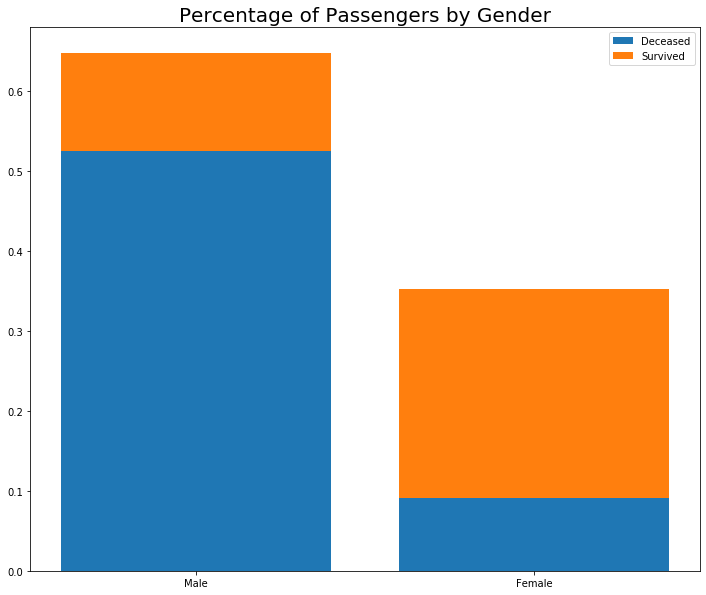

In [13]:
# number of deaths and survivors by class
death_gender = train.Sex[train["Survived"] == 0].value_counts()
survivor_gender = train.Sex[train["Survived"] == 1].value_counts()

#index
ind = ['male','female']

# ploating graph
plt.figure(figsize=(12, 10))

death_gender_bar = plt.bar(ind,death_gender[ind].values/num_people, width)
survivor_gender_bar = plt.bar(ind,survivor_gender[ind].values/num_people, width, bottom = death_gender[ind].values/num_people)

plt.title('Percentage of Passengers by Gender', fontdict={'fontsize':20})
plt.xticks(ind, ('Male','Female'))
plt.legend((death_gender_bar[0], survivor_gender_bar[0]), ('Deceased', 'Survived'))

plt.show()

In [14]:
train.groupby('Sex').Survived.value_counts(normalize = True, sort = False)

Sex     Survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

The death rate is lower in women.

# 2. Data Preparation

Putting all datasets together

In [44]:
all_data = pd.concat((train_drop , test), sort = False).reset_index(drop = True)

Creating a new feature: "Tilte"

In [45]:
all_data["Title"] = all_data.Name.str.extract(r'\b(\w+)\.')

In [46]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


As we can see there's no missing value in the feature Title. So we're going to use it to complete the missing values in the feature Age. Firts of all let's check the Title's values.

In [47]:
all_data.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Mme           1
Countess      1
Don           1
Dona          1
Capt          1
Sir           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

And the Title's values that the Age are NaN

In [48]:
all_data.Title[all_data.Age.isna() == True].value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: Title, dtype: int64

So we can replace the NaN values with the mean of the age 

In [49]:
#creating a dictionary with the titles that have NaN values
missing_age = all_data.Title[all_data.Age.isna() == True].value_counts().index.values

#fill the dictionary with the mean of the ages
age_na_fills = {}
for title in missing_age:
    age_na_fills[title] = round(all_data[(all_data.Title == title).values].Age.mean())

#replacing the NaN values
all_data["Age"] = all_data.apply(lambda row: age_na_fills.get(row.Title) if np.isnan(row['Age']) else row['Age'], axis=1)

In [50]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


The features Fare and Embarked still have NaN values. So we're going to replace the NaN valeus of Fare with the avarege of the all fares and the feature Embarked with the place where more people embarked (Southampton). 

In [51]:
all_data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [52]:
all_data.Embarked = all_data.Embarked.fillna('S')
all_data.Fare = all_data.Fare.fillna(all_data.Fare.mean())

Now let's clean the data set. Creating dummies variables and drop unnecessary features

In [53]:
#Creating dummies variables
all_data = pd.get_dummies(all_data, columns = ['Pclass','Sex', 'Embarked','Title'], drop_first = True)

#Dropping unecessary features
all_data = all_data.drop(columns = ['PassengerId','Name','Ticket','Cabin'])

Finally let's separete de train dataset from the test data set

In [54]:
X = all_data[0:n_train]
X_pred = all_data[n_train:]

# 3. Model selection

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In all models we define a K-fold cross validation using K =10

## 3.1 Logistic Regression

In [56]:
#10-fold cross validation for logistic regression
logreg = LogisticRegression(solver = 'liblinear')
score_logreg = cross_val_score(logreg, X , y, cv = 10, scoring = 'accuracy')
score_logreg.mean()

0.8238040517534898

## 3.2 Support Vector Machine (SVM)

In [57]:
#10-fold cross validation for SVM
svc = SVC(gamma = 'auto')
score_svc = cross_val_score(svc, X , y, cv = 10, scoring = 'accuracy')
score_svc.mean()

0.7521047554193622

## 3.3 Random Forest

In [58]:
#10-fold cross validation for Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(random_forest, X , y, cv = 10, scoring = 'accuracy')
score_rf.mean()

0.8070877312450346

## 3.4 K-Neighbor

In [59]:
#Serching for the optimal value of K for KNN
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    score_knn = cross_val_score(knn, X , y, cv = 10, scoring = 'accuracy')
    k_scores.append(score_knn.mean())

Text(0, 0.5, 'Cross Validation Accuracy')

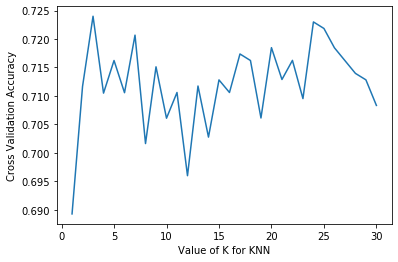

In [60]:
#plot the value of K for KNN versus the cross validation accuracy
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validation Accuracy')


The best accuracy is when K = 4.

In [61]:
#10-fold cross validation for KNN (K= 4)
knn = KNeighborsClassifier(n_neighbors = 4)
score_knn = cross_val_score(knn, X , y, cv = 10, scoring = 'accuracy')
score_knn.mean()

0.7104934173192601

# Submission

As we can see the model that has the best performance is Logistic Regression. So we're going to use it to predict the result of the problem.

In [63]:
logreg.fit(X,y)
y_pred = logreg.predict(X_pred)

In [76]:
sub = pd.DataFrame({'PassengerId':test.PassengerId,'Survived':y_pred})
sub.to_csv("titanic.csv", index = False)